In [1]:
#B2 = 0 tet 
#B3 = 1 tet 
#C2 = 1 tet 24h washout
#C3 = 5 tet 24h washout
#C4 = 10 tet 24h washout
figfolder = "/mnt/ceph/grieshaber_lab/Live_cell_data/Antibiotic_exp/"
dataFolder = '/mnt/ceph/grieshaber_lab/Live_cell_data/Antibiotic_exp/BmeC_Tetracycline_03-30-2023/data/' #big 
#dataFolder = '/mnt/ceph/grieshaber_lab/Live_cell_data/Antibiotic_exp/BMELVA_1ugOfl_24_06-28-2022/data2/' #small

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np; np.random.seed(22)
import seaborn as sns; sns.set(color_codes=True)
import pandas as pd

import math
#from mpldatacursor import HighlightingDataCursor
#from mpldatacursor import datacursor

In [87]:
ll

total 9880
-rw-r--r-- 1 scottg 4734696 Feb 14 11:29 baseLine_subtract_ssg_ssg2.pkl
-rw-r--r-- 1 scottg  824983 Aug 31 15:27 BMEC_ofl_24-07-20-2022.ipynb
-rw-r--r-- 1 scottg 2593262 Sep 14 11:00 BMEC_ofl_24_08-24-2022.ipynb
-rw-r--r-- 1 scottg 1963098 Feb 14 11:50 BmeC_Tetracycline_02-08-2023.ipynb


In [3]:
#imports all csv files in folder and concatonates the data sets from trackmate
import glob

df = pd.DataFrame()
for filename in glob.glob(dataFolder + '*.csv'):
    data_01 = pd.read_csv(filename, sep=',')
    filename = filename.split('/')[8]
    filename = filename.split('.')[0]
    print(filename)
    well = filename.split('_')[5]
    print(well)
    data_01['Well'] = well.split('-')[0]
    data_01['FOV'] = filename.split('_')[6]
    data = data_01[['Frame','Track_ID', 'Well', 'FOV', 'X', 'Y', 'Channel_1', 'Channel_2']]
    df = df.append(data,  ignore_index=True)
df['Sample_ID'] = df.Well + '-' + df.FOV
df['Sample_ID'] = df.Sample_ID + '-Track-' + df.Track_ID.astype(str)

EEuoAmeCWsh32_20x_03152023_3_MMStack_B2-Site_3
B2-Site
EEuoAmeCWsh32_20x_03152023_3_MMStack_C4-Site_4
C4-Site
EEuoAmeCWsh32_20x_03152023_3_MMStack_C2-Site_0
C2-Site
EEuoAmeCWsh32_20x_03152023_3_MMStack_B2-Site_8
B2-Site
EEuoAmeCWsh32_20x_03152023_3_MMStack_C2-Site_5
C2-Site
EEuoAmeCWsh32_20x_03152023_3_MMStack_B2-Site_1
B2-Site
EEuoAmeCWsh32_20x_03152023_3_MMStack_B2-Site_6
B2-Site
EEuoAmeCWsh32_20x_03152023_3_MMStack_C2-Site_2
C2-Site
EEuoAmeCWsh32_20x_03152023_3_MMStack_C4-Site_7
C4-Site
EEuoAmeCWsh32_20x_03152023_3_MMStack_C2-Site_9
C2-Site
EEuoAmeCWsh32_20x_03152023_3_MMStack_C4-Site_1
C4-Site
EEuoAmeCWsh32_20x_03152023_3_MMStack_C3-Site_9
C3-Site
EEuoAmeCWsh32_20x_03152023_3_MMStack_C3-Site_3
C3-Site
EEuoAmeCWsh32_20x_03152023_3_MMStack_B2-Site_7
B2-Site
EEuoAmeCWsh32_20x_03152023_3_MMStack_C4-Site_8
C4-Site
EEuoAmeCWsh32_20x_03152023_3_MMStack_C2-Site_6
C2-Site
EEuoAmeCWsh32_20x_03152023_3_MMStack_C4-Site_5
C4-Site
EEuoAmeCWsh32_20x_03152023_3_MMStack_C3-Site_1
C3-Site
EEuoAmeCWs

In [4]:
df

,Frame,Track_ID,Well,FOV,X,Y,Channel_1,Channel_2,Sample_ID
0,0.0,0,B2,3,32.398945,278.984119,452.119506,9600.330864,B2-3-Track-0
1,34.0,0,B2,3,37.479853,275.284390,6890.603457,15222.792593,B2-3-Track-0
2,63.0,0,B2,3,37.219477,285.108403,12328.830123,17700.138272,B2-3-Track-0
3,18.0,0,B2,3,37.754212,276.553969,2931.255309,14642.055309,B2-3-Track-0
4,122.0,0,B2,3,28.267494,272.878088,21656.016296,20375.995062,B2-3-Track-0
...,...,...,...,...,...,...,...,...,...
64304,121.0,2,C4,6,453.402052,651.854114,1974.131358,11700.837037,C4-6-Track-2
64305,119.0,2,C4,6,450.566652,656.195567,1617.831111,11139.773333,C4-6-Track-2
64306,80.0,2,C4,6,489.170088,646.882923,298.795062,1014.996049,C4-6-Track-2
64307,123.0,2,C4,6,452.687103,654.397599,2170.456790,10806.579753,C4-6-Track-2


In [5]:
#subtract baseline new using min value
def subtract_bl(in_df):
    traces = in_df
    traces_p = traces.pivot_table(index='Frame', columns='Sample_ID', values='Channel_1')
    df_test2 = pd.DataFrame()
    for columns in traces_p:
        minvalue = traces_p[columns].min()
        base_sub = lambda x: x-minvalue
        df_test = in_df[in_df['Sample_ID']==columns]
        df_test['bc_channel_2'] = df_test['Channel_1']-minvalue
        df_test2 = df_test2.append(df_test)
    return df_test2
    
df_bl = subtract_bl(df)

/mnt/ceph/scottg/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [6]:
#subtract baseline new using min value
def subtract_bl(in_df):
    traces = in_df
    traces_p = traces.pivot_table(index='Frame', columns='Sample_ID', values='Channel_2')
    df_test2 = pd.DataFrame()
    for columns in traces_p:
        minvalue = traces_p[columns].min()
        #base_sub = lambda x: x-minvalue
        df_test = in_df[in_df['Sample_ID']==columns]
        df_test['bc_channel_1'] = df_test['Channel_2']-minvalue
        df_test2 = df_test2.append(df_test)
    return df_test2
    
df_bl = subtract_bl(df_bl)

/mnt/ceph/scottg/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [7]:
df_f = df_bl

In [8]:
#filtering out inclusion near the edges of the field of view.
df2 = df_f[~(df_f['X']<10)]
df2 = df2[~(df2['X']>670)]
df2 = df2[~(df2['Y']<10)]
df2 = df2[~(df2['Y']>670)]
df2 = df_f
df2 = df_bl

In [9]:
totalFrames = 150
startTime = 25
interval = 0.5

frame_dict = {}
for i in range(totalFrames):
    if i == 0:
        frame = i 
        frame_dict[frame] = startTime+1
    else:
        frame = i 
        startTime += interval
        frame_dict[frame] = startTime+1
#frame_dict

In [10]:
df2['Time'] = df2['Frame'].map(frame_dict)

In [11]:
df2.to_pickle("baseLine_subtract_ssg_ssg2.pkl")

In [32]:
df2 = pd.read_pickle("baseLine_subtract_ssg_ssg2.pkl")

In [33]:
#want to make a list of Sample_IDs that have signal at two time points.
#df_f1 = df2['Sample_ID'][df2['Time']==55]
#df_f2 = df2['Sample_ID'][df2['Time']==56]
#df_f3 = df_f1[df_f1.isin(df_f2)]
#df3 = df2[df2['Sample_ID'].isin(df_f3)]
#
#df_f1 = df2['Sample_ID'][df2['Time']==38]
#df_f2 = df2['Sample_ID'][df2['Time']==40]
#df_f3 = df_f1[df_f1.isin(df_f2)]
#df4 = df2[df2['Sample_ID'].isin(df_f3)]

df_f1 = df2['Sample_ID'][df2['Time']==68]
df_f2 = df2['Sample_ID'][df2['Time']==68]
df_f3 = df_f1[df_f1.isin(df_f2)]
df5 = df2[df2['Sample_ID'].isin(df_f3)]
df5 = df2

In [38]:
#Samples
tet_0     = df5[df5['Sample_ID'].str.contains("B2").fillna(False)]
tet_1     = df5[df5['Sample_ID'].str.contains("B3").fillna(False)]
tet_5     = df5[df5['Sample_ID'].str.contains("B4").fillna(False)]
tet_10    = df5[df5['Sample_ID'].str.contains("B5").fillna(False)]
tet_1wo   = df5[df5['Sample_ID'].str.contains("C2").fillna(False)]
tet_5wo   = df5[df5['Sample_ID'].str.contains("C3").fillna(False)]
tet_10wo  = df5[df5['Sample_ID'].str.contains("C4").fillna(False)]

In [224]:
tet_1wo.drop(tet_1wo.loc[tet_1wo['Sample_ID']=='C2-5-Track-0'].index, inplace=True)

/mnt/ceph/scottg/anaconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [225]:
#filter for levels at anytime
#works

def filterII(in_df, threshold, channel):
    df_pass = pd.DataFrame(columns=['Sample_ID', 'pass'])
    in_multi = in_df.set_index(['Sample_ID', 'Time']).sort_index()
    for ID in in_multi.index.get_level_values(0).unique():
        max_value = in_multi.loc[(ID), channel].max()
        if max_value > threshold:
            #print(ID) #of some sort #need to collect these for isining
            #print(max_value) 
            df_pass = df_pass.append({'Sample_ID':ID, 'pass': True}, ignore_index=True)
        #df_out = in_df[in_df.index.get_level_values('Sample_ID').isin(df_pass['Sample_ID'])]
        df_out = df_pass.merge(in_df, on='Sample_ID')
    return df_out

# HctB = channel 2
# Euo = channel 1

tet_0_f     = filterII(tet_0   ,  3000, 'bc_channel_1')
tet_1wo_f   = filterII(tet_1wo   ,3000, 'bc_channel_1')
tet_5wo_f   = filterII(tet_5wo  , 3000, 'bc_channel_1')
tet_10wo_f  = filterII(tet_10wo,  3000, 'bc_channel_1')

In [226]:
#filter for max grater then a set threshold before a time
# 
# Set boolean for sample ID where Max value after time of min value is > 10 frames later.
# Need to add a additinal factor to only a max value before a passed value
#def filterI(in_df, threshold, time):
#    filter_df=in_df[in_df['Time']==time]
#    traces_p = filter_df.pivot_table(index='Time', columns='Sample_ID', values='bc_channel_1') #Euo
#    df_pass = pd.DataFrame(columns=['Sample_ID', 'pass'])
#    for columns in traces_p.columns:
#        max_value = traces_p[columns].max()
#        if max_value > threshold:
#            df_pass = df_pass.append({'Sample_ID':columns, 'pass': True}, ignore_index=True)
#            
#    new_df = pd.merge(in_df, df_pass,  how='right', on=['Sample_ID'])
#    return new_df
#     
#UNT_f      =   filterI(UNT ,3000, 25)
#WSH_f      =   filterI(WSH ,3000, 25)
#

#This works


In [227]:
#filter for max less then a set threshold before a time
 #Set boolean for sample ID where Max value after time of min value is > 10 frames later.
 #Need to add a additinal factor to only a max value before a passed value
def filterII(in_df, threshold, time):
    filter_df=in_df[in_df['Time']==time]
    traces_p = filter_df.pivot_table(index='Time', columns='Sample_ID', values='bc_channel_1') #Euo
    df_pass = pd.DataFrame(columns=['Sample_ID', 'pass'])
    for columns in traces_p.columns:
        max_value = traces_p[columns].max()
        if max_value < threshold:
            df_pass = df_pass.append({'Sample_ID':columns, 'pass': True}, ignore_index=True)
            
    new_df = pd.merge(in_df, df_pass,  how='right', on=['Sample_ID'])
    return new_df
     
tet_0_f2     = filterII(tet_0_f   ,   1000, 30)
tet_1wo_f2   = filterII(tet_1wo_f   , 1000, 30)
tet_5wo_f2   = filterII(tet_5wo_f  ,  1000, 30)
tet_10wo_f2  = filterII(tet_10wo_f,   1000, 30)


In [228]:
#need new filter for finding a max before a time
# 
# Set boolean for sample ID where Max value after time of min value is > 10 frames later.
# Need to add a additinal factor to only a max value before a passed value
#def filterIII(in_df, threshold, time):
#    filter_df=in_df[in_df['Time']==time]
#    traces_p = filter_df.pivot_table(index='Time', columns='Sample_ID', values='bc_channel_2') #HctB
#    df_pass = pd.DataFrame(columns=['Sample_ID', 'pass'])
#    for columns in traces_p.columns:
#        max_value = traces_p[columns].max()
#        if max_value < threshold:
#            df_pass = df_pass.append({'Sample_ID':columns, 'pass': True}, ignore_index=True)
#            
#    new_df = pd.merge(in_df, df_pass,  how='right', on=['Sample_ID'])
#    return new_df
#     
#UNT_f3  =   filterIII(UNT,2000, 75)
#WSH_f3  =   filterIII(WSH,2000, 75)
##This works


In [229]:
#need new filter for finding a max before a time
# 
# Set boolean for sample ID where Max value after time of min value is > 10 frames later.
# Need to add a additinal factor to only a max value before a passed value
#def filterIIIII(in_df, threshold, time):
#    filter_df=in_df[in_df['Time']==time]
#    traces_p = filter_df.pivot_table(index='Time', columns='Sample_ID', values='bc_channel_2') #HctB
#    df_pass = pd.DataFrame(columns=['Sample_ID', 'pass'])
#    for columns in traces_p.columns:
#        max_value = traces_p[columns].max()
#        if max_value > threshold:
#            df_pass = df_pass.append({'Sample_ID':columns, 'pass': True}, ignore_index=True)
#            
#    new_df = pd.merge(in_df, df_pass,  how='right', on=['Sample_ID'])
#    return new_df
#     
#Cip_05_f1 = filterII(Cip_05, 1500, 62)
#Cip_1_f1  = filterII(Cip_1,  1500, 62)
#Cip_5_f1  = filterII(Cip_5,  1500, 62)
#Cip_10_f1 = filterII(Cip_10, 1500, 62)
#Cip_15_f1 = filterII(Cip_15, 1500, 62)
#Cip_20_f1 = filterII(Cip_20, 1500, 62)
#UNT_f1  =   filterII(UNT, 1500, 62)
##This works
#

In [230]:
#filter for levels at anytime

#def filter_multi(in_df, threshold, channel):
#    df_test = in_df[in_df['bc_channel_2'] > threshold]
#    idexlist = df_test.index.get_level_values(0).unique() 
#    filtered_df = df_mulit_index[df_mulit_index.index.get_level_values('Sample_ID').isin(idexlist)]
#    filtered_df = filtered_df.droplevel(0)
#    filtered_df['Sample_ID'] = filtered_df.Well + '-' + filtered_df.FOV
#    filtered_df['Sample_ID'] = filtered_df.Sample_ID + '-Track-' +filtered_df.Track_ID.astype(str)
#    return filtered_df
#
## HctB = channel 2
## Euo = channel 1
#Cip_05_f1 = filter_multi(Cip_05_multi, 0, 'bc_channel_1')
#Cip_1_f1  = filter_multi(Cip_1_multi,  0, 'bc_channel_1')
#Cip_5_f1  = filter_multi(Cip_5_multi,  0, 'bc_channel_1')
#Cip_10_f1 = filter_multi(Cip_10_multi, 0, 'bc_channel_1')
#Cip_15_f1 = filter_multi(Cip_15_multi, 0, 'bc_channel_1')
#Cip_20_f1 = filter_multi(Cip_20_multi, 0, 'bc_channel_1')
#UNT_f1    = filter_multi(UNT_multi,    0, 'bc_channel_1')

In [231]:
Cip_20['bc_channel_2'].max()

NameError: name 'Cip_20' is not defined

In [232]:
#need new filter for finding a max before a time
# 
# Set boolean for sample ID where Max value after time of min value is > 10 frames later.
# Need to add a additinal factor to only a max value before a passed value
#def filterIIII(in_df, threshold, time):
#    filter_df=in_df[in_df['Time']==time]
#    traces_p = filter_df.pivot_table(index='Time', columns='Sample_ID', values='bc_channel_2') #HctB
#    df_pass = pd.DataFrame(columns=['Sample_ID', 'pass'])
#    for columns in traces_p.columns:
#        max_value = traces_p[columns].max()
#        if max_value > threshold:
#            df_pass = df_pass.append({'Sample_ID':columns, 'pass': True}, ignore_index=True)
#            
#    new_df = pd.merge(in_df, df_pass,  how='right', on=['Sample_ID'])
#    return new_df
#     
#UNT_f3  =   filterIIII(UNT,1500,78)
#WSH_f3  =   filterIIII(WSH,1500,78)
#Cip_f3  =   filterIIII(Cip,1500,78)
##This works


In [39]:
def pivot(in_df, channel):
    in_df_p = in_df.pivot_table(index='Time', columns='Sample_ID', values=channel)
    #in_df_p = in_df.pivot_table(index='Time', columns='Sample_ID', values=channel)
    in_df_p['mean'], in_df_p['std'], in_df_p['HPI'] = in_df_p.mean(axis=1), in_df_p.std(axis=1), in_df_p.index
    return in_df_p

In [40]:
HcB_tet_0_p = pivot(tet_0_f, 'bc_channel_2')
HcB_tet_1wo_p = pivot(tet_1wo_f, 'bc_channel_2')
HcB_tet_5wo_p = pivot(tet_5wo_f, 'bc_channel_2')
HcB_tet_10wo_p = pivot(tet_10wo_f, 'bc_channel_2')

Euo_tet_0_p =     pivot(tet_0_f, 'bc_channel_1')
Euo_tet_1wo_p =   pivot(tet_1wo_f, 'bc_channel_1')
Euo_tet_5wo_p =   pivot(tet_5wo_f, 'bc_channel_1')
Euo_tet_10wo_p = pivot(tet_10wo_f, 'bc_channel_1')

NameError: name 'tet_0_f' is not defined

In [41]:
HcB_tet_0_p =       pivot(tet_0, 'bc_channel_2')
HcB_tet_1wo_p =   pivot(tet_1wo, 'bc_channel_2')
HcB_tet_5wo_p =   pivot(tet_5wo, 'bc_channel_2')
HcB_tet_10wo_p = pivot(tet_10wo, 'bc_channel_2')

Euo_tet_0_p =       pivot(tet_0, 'bc_channel_1')
Euo_tet_1wo_p =   pivot(tet_1wo, 'bc_channel_1')
Euo_tet_5wo_p =   pivot(tet_5wo, 'bc_channel_1')
Euo_tet_10wo_p = pivot(tet_10wo, 'bc_channel_1')

In [236]:
#37/2
#104
#HcB_Cip_20_p
#(37/2)/104*100
#17.8 % recovered.

In [18]:
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import LogLocator
c = sns.color_palette('Set1',16).as_hex()
c[1]

'#377eb8'

<IPython.core.display.Javascript object>


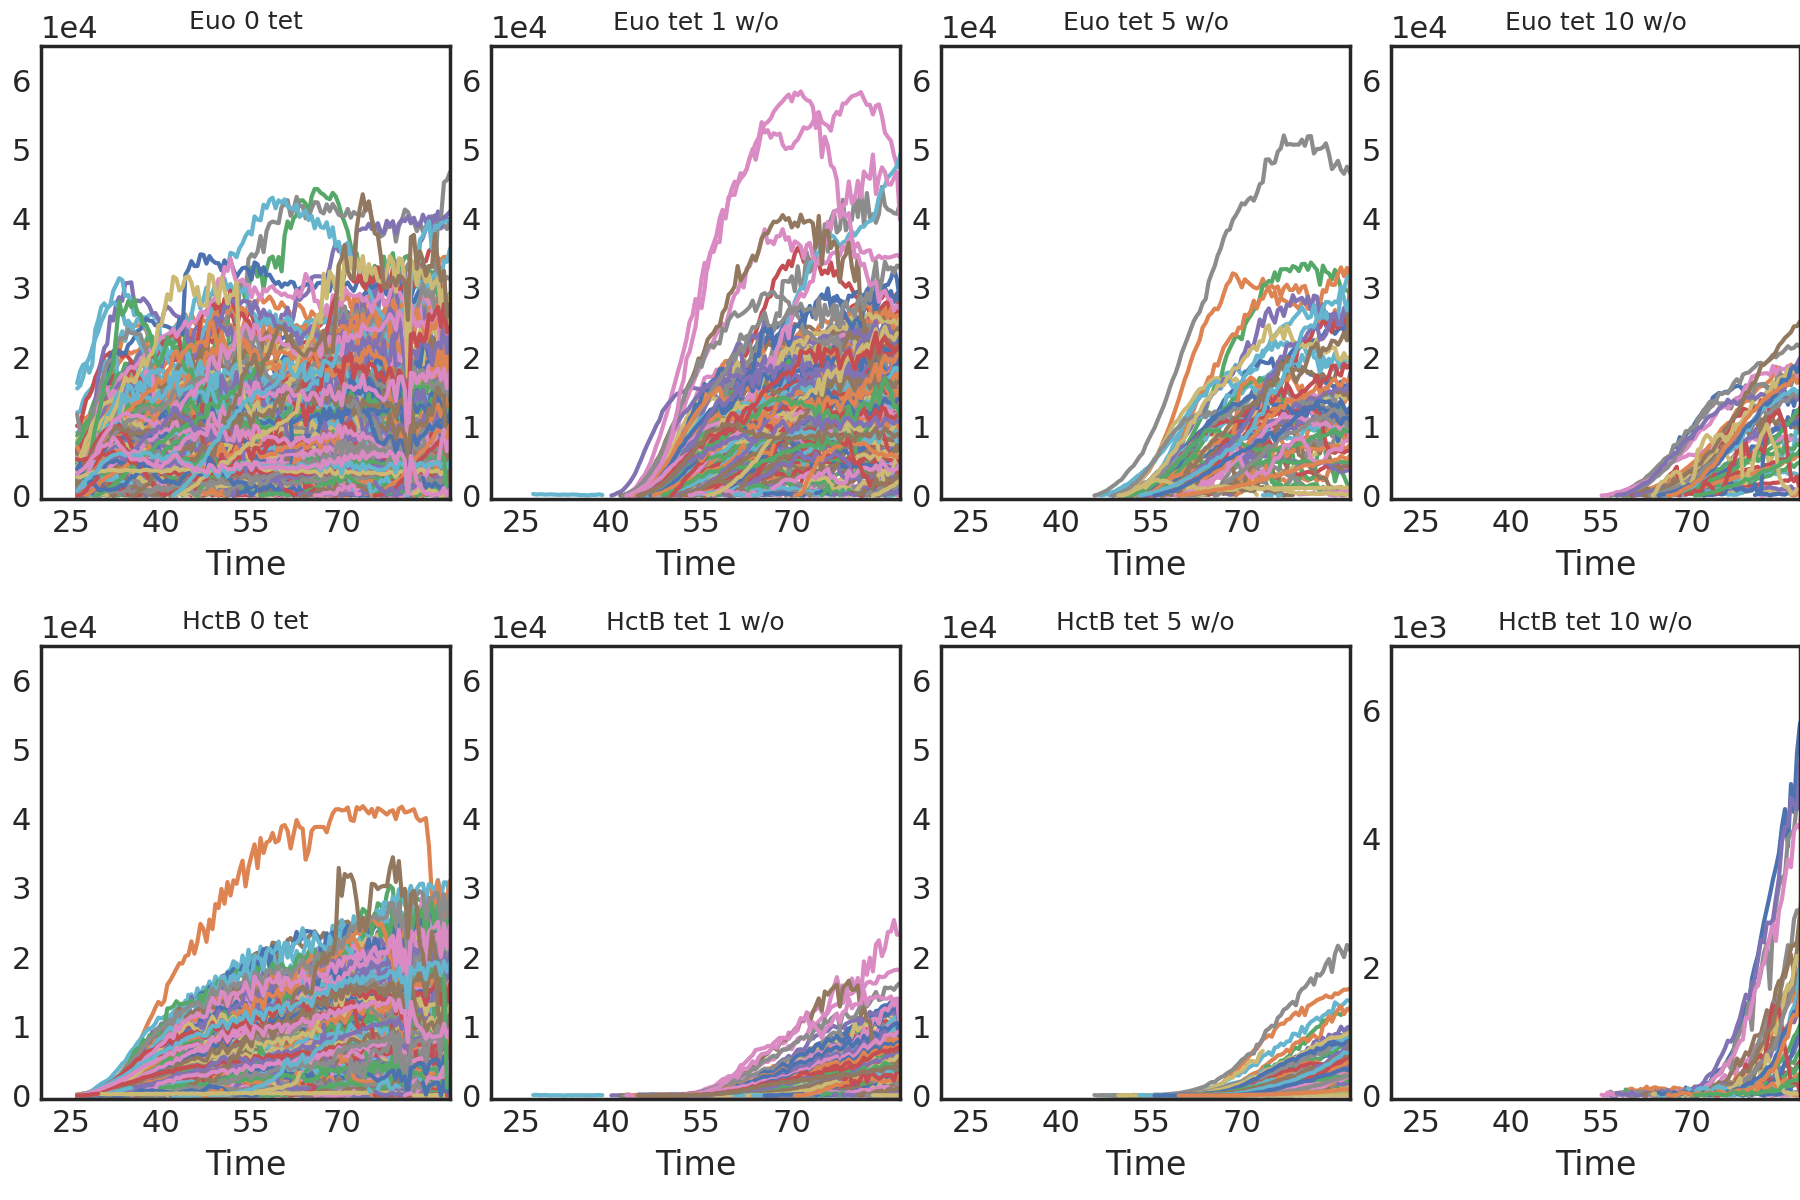

In [42]:
#(x, y) to (x+dx, y+dy)
#matplotlib inline
%matplotlib notebook
with plt.style.context('seaborn-white'):
    fig, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(ncols=4, nrows=2)
    
    Euo_tet_0_p.drop(columns=['std', 'mean','HPI']).plot(legend=False, ax=ax1)
    Euo_tet_1wo_p.drop(columns=['std', 'mean','HPI']).plot(legend=False, ax=ax2)
    Euo_tet_5wo_p.drop(columns=['std', 'mean','HPI']).plot(legend=False, ax=ax3)
    Euo_tet_10wo_p.drop(columns=['std', 'mean','HPI']).plot(legend=False, ax=ax4)
    
    HcB_tet_0_p.drop(columns=['std', 'mean','HPI']).plot(legend=False, ax=ax5)
    HcB_tet_1wo_p.drop(columns=['std', 'mean','HPI']).plot(legend=False, ax=ax6)
    HcB_tet_5wo_p.drop(columns=['std', 'mean','HPI']).plot(legend=False, ax=ax7)
    HcB_tet_10wo_p.drop(columns=['std', 'mean','HPI']).plot(legend=False, ax=ax8)
    
    ax1.set_ylim([-500, 65000])
    ax2.set_ylim([-500, 65000])
    ax3.set_ylim([-500, 65000])
    ax4.set_ylim([-500, 65000])
    ax5.set_ylim([-500, 65000])
    ax6.set_ylim([-500, 65000])
    ax7.set_ylim([-500, 65000])
    ax8.set_ylim([-50, 7000])
    
    ax1.set_xlim([20,  88])
    ax2.set_xlim([20,  88])
    ax3.set_xlim([20,  88])
    ax4.set_xlim([20,  88])
    ax5.set_xlim([20,  88])
    ax6.set_xlim([20,  88])
    ax7.set_xlim([20,  88])
    ax8.set_xlim([20,  88])
    
    ax1.set_title('Euo 0 tet', fontsize=9)
    ax2.set_title('Euo tet 1 w/o', fontsize=9)
    ax3.set_title('Euo tet 5 w/o', fontsize=9)
    ax4.set_title('Euo tet 10 w/o', fontsize=9)
    ax5.set_title('HctB 0 tet', fontsize=9)
    ax6.set_title('HctB tet 1 w/o', fontsize=9)
    ax7.set_title('HctB tet 5 w/o', fontsize=9)
    ax8.set_title('HctB tet 10 w/o', fontsize=9)
    
    ax1.ticklabel_format( axis="y", style="sci", scilimits=(0,0))
    ax2.ticklabel_format( axis="y", style="sci", scilimits=(0,0))
    ax3.ticklabel_format( axis="y", style="sci", scilimits=(0,0))
    ax4.ticklabel_format( axis="y", style="sci", scilimits=(0,0))
    ax5.ticklabel_format( axis="y", style="sci", scilimits=(0,0))
    ax6.ticklabel_format( axis="y", style="sci", scilimits=(0,0))
    ax7.ticklabel_format( axis="y", style="sci", scilimits=(0,0))
    ax8.ticklabel_format( axis="y", style="sci", scilimits=(0,0))
   
    ax1.xaxis.set_ticks(np.arange(25, 80,  15))
    ax2.xaxis.set_ticks(np.arange(25, 80,  15))
    ax3.xaxis.set_ticks(np.arange(25, 80,  15))
    ax4.xaxis.set_ticks(np.arange(25, 80,  15))
    ax5.xaxis.set_ticks(np.arange(25, 80,  15))
    ax6.xaxis.set_ticks(np.arange(25, 80,  15))
    ax7.xaxis.set_ticks(np.arange(25, 80,  15))
    ax8.xaxis.set_ticks(np.arange(25, 80,  15))
    
    #ax2.arrow(24, 200, 0, 2000,   color=c[0], lw=3, alpha=1, head_width = 2, length_includes_head = True, 
              #head_length = 20, overhang = 10, head_starts_at_zero=False)
    from matplotlib.patches import FancyArrow
    arrow = FancyArrow(24, 0, 0, 10000, width = 1, head_width=2, head_length = None, color = 'red', 
                       head_starts_at_zero=True, overhang = 20)
    #ax1.add_patch(arrow)
    #plt.rcParams['xaxes.labelsize'] = 16
    plt.tight_layout(pad=0.00000000001, h_pad=0.001, w_pad=.001)
    fig.set_size_inches(9,6)
    plt.savefig(figfolder+ 'Tet_wash_24h_03-30-2023.pdf')
    

In [31]:
Euo_tet_0_p.shape[1]-3
#Euo_Cip_1_p
#tet0 = 514
#tet 1wo = 256 = 50%
#tet 5wo = 72  = 14%
#tet 10wo = 43  = 8%



514

In [22]:
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import LogLocator
c = sns.color_palette('Set1',16).as_hex()
c[1]

'#377eb8'

<IPython.core.display.Javascript object>


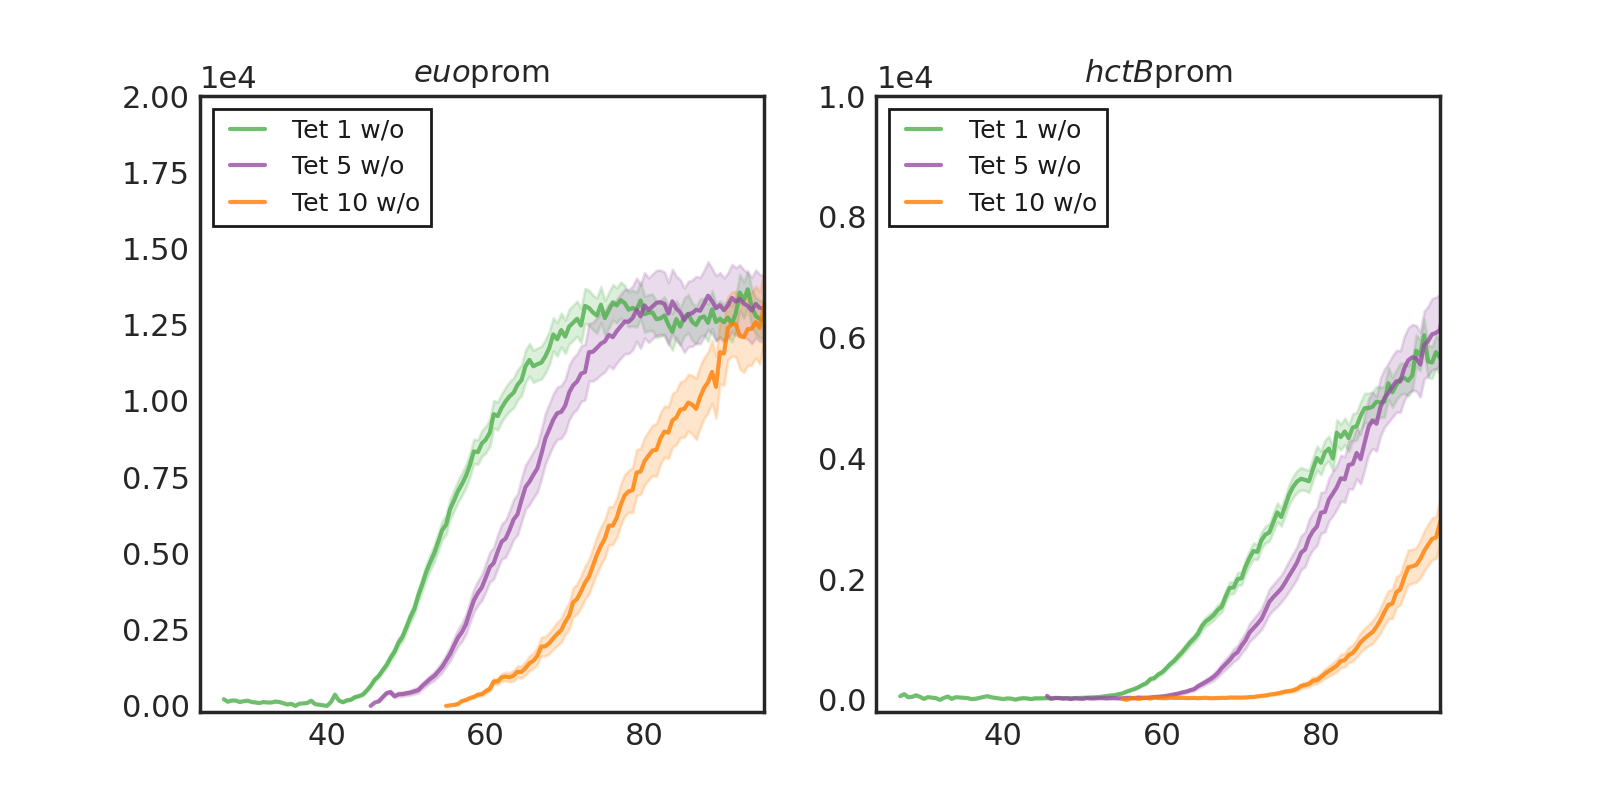

In [44]:
with plt.style.context('seaborn-white'):
    #%matplotlib inline
    %matplotlib notebook
    fig, ((ax1,ax2)) = plt.subplots(ncols=2, nrows=1)
    #fig.tight_layout()
   
    def plot_sample_1(sample, color, name, style, mstyle, fcolor, i):
        ax1.plot(sample.index, sample['mean']*i, color, label=name, linestyle = style, marker=mstyle, alpha=0.8, ms = 5, markerfacecolor=fcolor, markeredgecolor=color, markeredgewidth=1)     
        #ax2.fill_between(sample.index, sample['mean']-sample['std'], sample['mean']+sample['std'], color=color, alpha=0.15)
        ax1.fill_between(sample.index, sample['mean']*i-(sample['std']*i)/math.sqrt(len(sample.columns)), sample['mean']*i+(sample['std']*i)/math.sqrt(len(sample.columns)), color=color, alpha=0.2)
    
    #plot_sample_1(Euo_tet_0_p     , c[1],  'UNT 24h' , '-', '', 'None', 1)
    plot_sample_1(Euo_tet_1wo_p     , c[2],  'Tet 1 w/o' , '-', '', 'None', 1)
    plot_sample_1(Euo_tet_5wo_p     , c[3],  'Tet 5 w/o' , '-', '', 'None', 1)
    plot_sample_1(Euo_tet_10wo_p    , c[4],  'Tet 10 w/o' , '-', '', 'None', 1)

    def plot_sample_2(sample, color, name, style, mstyle, fcolor, i):
        ax2.plot(sample.index, sample['mean']*i, color, label=name, linestyle = style, marker=mstyle, alpha=0.8, ms = 5, markerfacecolor=fcolor, markeredgecolor=color, markeredgewidth=1)     
        #ax2.fill_between(sample.index, sample['mean']-sample['std'], sample['mean']+sample['std'], color=color, alpha=0.15)
        ax2.fill_between(sample.index, sample['mean']*i-(sample['std']*i)/math.sqrt(len(sample.columns)), sample['mean']*i+(sample['std']*i)/math.sqrt(len(sample.columns)), color=color, alpha=0.2)
    
    #plot_sample_2(HcB_tet_0_p     , c[1],  'UNT 24h' , '-', '', 'None', 1)
    plot_sample_2(HcB_tet_1wo_p     , c[2],  'Tet 1 w/o'  , '-', '', 'None', 1)
    plot_sample_2(HcB_tet_5wo_p     , c[3],  'Tet 5 w/o' , '-', '', 'None', 1)
    plot_sample_2(HcB_tet_10wo_p    , c[4],  'Tet 10 w/o', '-', '', 'None', 1)

with plt.style.context('classic'):
    ax1.legend(loc='upper left',  fontsize=9)
    ax2.legend(loc='upper left',  fontsize=9)
    ax3.legend(loc='upper left',  fontsize=9)
    ax4.legend(loc='upper left',  fontsize=9)

    ax1.set_title('$euo$prom', fontsize=11)
    ax2.set_title('$hctB$prom', fontsize=11)
    ax3.set_title('Unt', fontsize=11)
    ax4.set_title('Euo', fontsize=11)

    ax1.set_xlim([24, 95])
    ax2.set_xlim([24, 95])
    ax3.set_xlim([24, 95])
    ax4.set_xlim([24, 95])

    ax1.ticklabel_format( axis="y", style="sci", scilimits=(0,0))
    ax2.ticklabel_format( axis="y", style="sci", scilimits=(0,0))
    ax3.ticklabel_format( axis="y", style="sci", scilimits=(0,0))
    ax4.ticklabel_format( axis="y", style="sci", scilimits=(0,0))

    ax1.set_ylim([-200, 20000])
    ax2.set_ylim([-200, 10000])
    #ax3.set_ylim([-100, 25000])
    #ax4.set_ylim([-100, 25000])

    
    #ax1.arrow(24, -1000, 0, 500,   color=c[0], lw=3, alpha=1, head_width = 1, length_includes_head = False, head_length = 50, overhang = 10)
    #ax2.arrow(24, -1000, 0, 1100,   color=c[0], lw=3, alpha=1, head_width = 1, length_includes_head = False, head_length = 50, overhang = 10)
    #ax1.arrow(20, -1000, 0, 500,   color=c[0], lw=3, alpha=1, head_width = 1, length_includes_head = False, head_length = 50, overhang = 10)
    #ax2.arrow(20, -1000, 0, 500,   color=c[0], lw=3, alpha=1, head_width = 1, length_includes_head = False, head_length = 50, overhang = 6)
    #ax3.arrow(31, -1000, 0, 33000,   color=c[0], lw=3, alpha=1, head_width = 1, length_includes_head = False, head_length = 50, overhang = 50)
    #ax4.arrow(26, 700, 0, 11000,   color=c[0], lw=3, alpha=1, head_width = 1, length_includes_head = False, head_length = 50, overhang = 10)
    #ax3.arrow(17, -1000, 0, 1500,   color=c[0], lw=3, alpha=1, head_width = 1, length_includes_head = False, head_length = 50, overhang = 10)
    #ax4.arrow(20, 35000, 0, 1700,   color=c[0], lw=3, alpha=1, head_width = 1, length_includes_head = False, head_length = 50, overhang = 6)
          
    fig.set_size_inches(8, 4)
    plt.savefig(figfolder+ 'Tet_wash_at_24h_avs_03-30-2023.pdf')

In [95]:
# Calculate max, min, halfmax and time to halfmax
def halfmax(in_pd):
    in_pd_c1_p = in_pd.pivot_table(index='Sample_ID', columns='Time', values='bc_channel_1')
    in_pd_c1_p['max_c1'] = in_pd_c1_p.max(axis=1)
    in_pd_c2_p = in_pd.pivot_table(index='Sample_ID', columns='Time', values='bc_channel_2')
    in_pd_c2_p['max_c2'] = in_pd_c2_p.max(axis=1)
    #print(in_pd_c1_p)
    #in_pd_p['min'] = in_pd_p.min(axis=1)
    in_pd_c1_p['min_c1'] = 1
    in_pd_c2_p['min_c2'] = 1
    #in_pd_p['half_max'] = np.sqrt(in_pd_p['max']*in_pd_p['min'])
    #in_pd_c1_p['half_max_c1'] = np.sqrt(in_pd_c1_p['max_c1'])
    #in_pd_c2_p['half_max_c2'] = np.sqrt(in_pd_c2_p['max_c2'])
    in_pd_c1_p['half_max_c1'] = in_pd_c1_p['max_c1']/2
    in_pd_c2_p['half_max_c2'] = in_pd_c2_p['max_c2']/2
    #print(in_pd_p['half_max'])
    in_pd_f = in_pd_c1_p[['min_c1','max_c1', 'half_max_c1']]
    in_pd_f['min_c2'] = in_pd_c2_p['min_c2']
    in_pd_f['max_c2'] = in_pd_c2_p['max_c2']
    in_pd_f['half_max_c2'] = in_pd_c2_p['half_max_c2']
    in_pd_f.index.name = None
    in_pd_f['Sample_ID'] = in_pd_f.index
    #print(in_pd_c2_p['max_c2'])
    traces = in_pd
    
    traces_c1_p =       traces.pivot_table(index='Time', columns='Sample_ID', values='bc_channel_1') 
    traces_c1_p_fill =  traces_c1_p.fillna(method='bfill') #back fill to frame 0
    traces_c1_p_fill.reset_index(inplace = True)
    df_c1_f = traces_c1_p_fill
    df_c1_f.set_index(df_c1_f['Time'], inplace=True)
    
    traces_c2_p =       traces.pivot_table(index='Time', columns='Sample_ID', values='bc_channel_2') 
    traces_c2_p_fill =  traces_c2_p.fillna(method='bfill') #back fill to frame 0
    traces_c2_p_fill.reset_index(inplace = True)
    df_c2_f = traces_c2_p_fill
    df_c2_f.set_index(df_c2_f['Time'], inplace=True)
    
    time_halfmax_c1 = pd.DataFrame(columns=['Sample_ID', 'time_to_halfmax_c1'])
    time_halfmax_c2 = pd.DataFrame(columns=['Sample_ID', 'time_to_halfmax_c2'])
    for index, row in in_pd_f.iterrows():
        sampleID = row['Sample_ID']
        #print(sampleID)
        time_c1 = (df_c1_f[sampleID]-row['half_max_c1']).abs().sort_values().index[0]
        time_c2 = (df_c2_f[sampleID]-row['half_max_c2']).abs().sort_values().index[0]
      
        time_halfmax_c1 = time_halfmax_c1.append({'Sample_ID':sampleID, 'time_to_halfmax_c1': time_c1}, ignore_index=True)
        time_halfmax_c2 = time_halfmax_c2.append({'Sample_ID':sampleID, 'time_to_halfmax_c2': time_c2}, ignore_index=True)
       
    #data_summary = pd.merge(in_pd_f, time_halfmax_c1, time_halfmax_c2, on='Sample_ID')
    data_summary = pd.merge(time_halfmax_c1, time_halfmax_c2, on='Sample_ID')
    #still need to add x y coordinates at last time imaged
    df_time = df3[df3['Time']==30]
    df_time = df_time[['Sample_ID', 'X', 'Y']]
    #want to mearge with data_summary but only for Sample IDs in both)
    result = pd.merge(data_summary, df_time, how='inner', on=['Sample_ID'])
    return result

#BMEC_BC_hm      = halfmax(BMEC_BC_f)
#BMEC_BU_hm      = halfmax(BMEC_BU_f)
BMECC2_hm      = halfmax(WSH)
#BMEC_CY_hm      = halfmax(BMEC_CY_f)
#HAIN_BC_hm      = halfmax(HAIN_BC_f)
#HAIN_BU_hm      = halfmax(HAIN_BU_f)
#HAIN_UN_hm      = halfmax(HAIN_UN_f)
#HAIN_CY_hm      = halfmax(HAIN_CY_f)
#Scc2_BC_hm      = halfmax(Scc2_BC_f)
#Scc2_CY_hm      = halfmax(Scc2_CY_f)
#Scc2_BU_hm      = halfmax(Scc2_BU_f)
#Scc2_UN_hm      = halfmax(Scc2_UN_f)


/mnt/ceph/scottg/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/mnt/ceph/scottg/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/mnt/ceph/scottg/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [29]:
BMECC2_hm

,Sample_ID,time_to_halfmax_c1,time_to_halfmax_c2,X,Y
0,A3-0-Track-1,34.5,39.5,634.344677,357.270554
1,A3-0-Track-10,57.0,48.5,605.880737,508.683533
2,A3-0-Track-11,30.0,42.0,358.798813,357.175225
3,A3-0-Track-3,36.0,41.5,530.209359,230.558084
4,A3-0-Track-4,45.5,48.5,79.338230,599.229085
5,A3-0-Track-5,54.5,46.5,209.000000,0.000000
6,A3-0-Track-6,30.0,45.5,238.888255,251.316654
7,A3-0-Track-7,63.5,50.0,426.387281,285.298469
8,A3-0-Track-8,35.0,31.5,443.515981,353.010570
9,A3-0-Track-9,56.5,63.0,51.666271,362.301737


In [30]:
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure
from bokeh.io import push_notebook, show, output_notebook, output_file
from bokeh.layouts import row
from bokeh.models import ColumnDataSource, Range1d, LabelSet, Label
from bokeh.models import HoverTool
from collections import OrderedDict
from bokeh.layouts import layout
from bokeh.models import Toggle, BoxAnnotation, CustomJS

def pivot2(in_df, channel):
    in_df_p = in_df.pivot_table(index='Time', columns='Sample_ID', values=channel)
    in_df_p['mean'], in_df_p['std'] = in_df_p.mean(axis=1), in_df_p.std(axis=1)
    return in_df_p

output_notebook()

c = sns.color_palette('Set1',1000).as_hex()

def interactive_graph(in_df):
    in_df_p = pivot2(in_df, 'bc_channel_2')
    df_new = in_df_p[in_df_p.columns[0:-2]]
    result = halfmax(in_df)
    #result = in_df

    tools_to_show = 'box_zoom,save,hover,reset'
    p = figure(plot_height = 500, plot_width = 500,
               toolbar_location='above', tools=tools_to_show,
               # "easy" tooltips in Bokeh 0.13.0 or newer
               tooltips=[("Location","$name")])
    j=0
    for i, column in enumerate(df_new):
        trackx = result[result['Sample_ID'] == df_new.iloc[:,i].name].X.values
        tracky = result[result['Sample_ID'] == df_new.iloc[:,i].name].Y.values
        x = str(int(trackx))
        y = str(int(tracky))
        well = df_new.iloc[:,i].name.split('-')[0]
        field = df_new.iloc[:,i].name.split('-')[1]
        well = df_new.iloc[:,i].name
        name = well+', x='+x+', y='+y
        p.line(df_new.index.values, df_new.iloc[:,i].values, name = name, line_color=c[j], line_width=2.5)
        j=j+1
    p.legend.location = "top_left"
    p.legend.click_policy="mute"
    show(p)
interactive_graph(WSH)

Loading BokehJS ...

/home/rickettsia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/rickettsia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/rickettsia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [27]:
WSH_f5.drop(WSH_f5.loc[WSH_f5['Sample_ID']=='A3-2-Track-10'].index, inplace=True)

In [ ]:
#data2

In [ ]:
##plot standards
#ax = data2.plot(kind='scatter', y='bc_channel_2', x='Time')
#plt.title('Ch_2 vs Time')

In [ ]:
import statsmodels.formula.api as smf
#linear Regresion models

HctBlm = smf.ols(formula='bc_channel_2 ~ Time', data=data2).fit()
print(HctBlm.params)
print(HctBlm.rsquared)
# slope of model = "Time" in output

In [ ]:
#show lines of best fit
HctBfit = pd.DataFrame({'Time': [data2.Time.min(), data2.Time.max()]})
preds = HctBlm.predict(HctBfit)

fig = data2.plot(kind='scatter', y='bc_channel_2', x='Time',c='m')

fig.plot(HctBfit,preds,c='m', linewidth=2)
plt.title('HctB')
plt.ylabel('Fluorescence/Inclusion')
plt.xlabel('HPI')
plt.ylim([0,42000])
plt.xlim([33,62])

plt.savefig('BMEC_UN_C1-1-Track-887.pdf')

In [ ]:
import statsmodels.formula.api as smf
#linear Regresion models

Euolm = smf.ols(formula='bc_channel_1 ~ Time', data=data2).fit()
print(Euolm.params)
print(Euolm.rsquared)
# slope of model = "Time" in output

In [ ]:
#show lines of best fit
Euofit = pd.DataFrame({'Time': [data2.Time.min(), data2.Time.max()]})
preds = Euolm.predict(Euofit)

fig = data2.plot(kind='scatter', y='bc_channel_1', x='Time')


fig.plot(Euofit,preds,c='red', linewidth=2)
plt.title('Euo')
#print(Euolm.rsquared)

In [164]:
Euo_WSH_p['A3-0-Track-7']

Time
12.0             NaN
12.5             NaN
13.0             NaN
13.5        0.000000
14.0       48.142661
            ...     
77.0    43468.013063
77.5    43866.624270
78.0    43093.346511
78.5    42660.156067
79.0    42414.342729
Name: A3-0-Track-7, Length: 135, dtype: float64

In [1]:
#use rolling mean to trim at inclusion explosion
#role till negitive then trim to beginng of window

 #Euo_WSH_p['A3-0-Track-7'].rolling(10).mean()
Test_df = Euo_WSH_p.rolling(3, win_type='gaussian').mean['A3-0-Track-7']

NameError: name 'Euo_WSH_p' is not defined

In [170]:
Test_df

<bound method Window.mean of Window [window=3,center=False,win_type=gaussian,axis=0]>

In [31]:
HcB_WSH_p

Sample_ID,A3-0-Track-1,A3-0-Track-10,A3-0-Track-11,A3-0-Track-3,A3-0-Track-4,A3-0-Track-5,A3-0-Track-6,A3-0-Track-7,A3-0-Track-8,A3-0-Track-9,...,A3-9-Track-2,A3-9-Track-3,A3-9-Track-4,A3-9-Track-6,A3-9-Track-7,A3-9-Track-8,A3-9-Track-9,mean,std,HPI
Time,,,,,,,,,,,,,,,,,,,,,
17.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,17.5
18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.251798,17.041105,18.0
18.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.816210,16.399834,18.5
19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.644393,16.557539,19.0
19.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.934046,13.067778,19.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70.0,NaN,19791.989893,NaN,NaN,41515.731001,19559.030126,15125.735277,34697.484742,NaN,12516.919922,...,53470.431876,NaN,52036.166181,NaN,NaN,NaN,NaN,20733.112141,12973.002227,70.0
70.5,NaN,19957.814577,NaN,NaN,42142.600000,21640.602138,15241.939942,30770.020214,NaN,12625.608941,...,53426.249757,NaN,52856.313703,NaN,NaN,NaN,NaN,20855.988707,12939.355842,70.5
71.0,NaN,20102.151020,NaN,NaN,42226.537026,21541.538970,15710.501652,29832.847036,NaN,13153.306900,...,54082.833819,NaN,53567.116812,NaN,NaN,NaN,NaN,21059.899832,13048.673535,71.0


In [74]:
from scipy.signal import find_peaks
peaks, _ = find_peaks(HcB_WSH_p['A3-0-Track-7'], prominence = 1500)
hours = HcB_WSH_p['A3-0-Track-7'].iloc[peaks]
hours
#dfpeaks = pd.DataFrame(peaks)
#dfpeaks = dfpeaks

Time
69.5    34743.23654
Name: A3-0-Track-7, dtype: float64

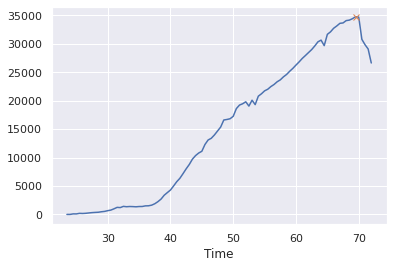

In [75]:
HcB_WSH_p['A3-0-Track-7'].drop(columns=['std', 'mean','HPI']).plot(legend=False)
plt.plot(hours, "x")

In [197]:
# Calculate max, min, halfmax and time to halfmax
def halfmax(in_pd):
    in_pd_c1_p = in_pd.pivot_table(index='Sample_ID', columns='Time', values='bc_channel_1')
    in_pd_c1_p['max_c1'] = in_pd_c1_p.max(axis=1)
    in_pd_c2_p = in_pd.pivot_table(index='Sample_ID', columns='Time', values='bc_channel_2')
    in_pd_c2_p['max_c2'] = in_pd_c2_p.max(axis=1)
    #print(in_pd_c1_p)
    #in_pd_p['min'] = in_pd_p.min(axis=1)
    in_pd_c1_p['min_c1'] = 1
    in_pd_c2_p['min_c2'] = 1
    #in_pd_p['half_max'] = np.sqrt(in_pd_p['max']*in_pd_p['min'])
    #in_pd_c1_p['half_max_c1'] = np.sqrt(in_pd_c1_p['max_c1'])
    #in_pd_c2_p['half_max_c2'] = np.sqrt(in_pd_c2_p['max_c2'])
    in_pd_c1_p['half_max_c1'] = in_pd_c1_p['max_c1']/2
    in_pd_c2_p['half_max_c2'] = in_pd_c2_p['max_c2']/2
    #print(in_pd_p['half_max'])
    in_pd_f = in_pd_c1_p[['min_c1','max_c1', 'half_max_c1']]
    in_pd_f['min_c2'] = in_pd_c2_p['min_c2']
    in_pd_f['max_c2'] = in_pd_c2_p['max_c2']
    in_pd_f['half_max_c2'] = in_pd_c2_p['half_max_c2']
    in_pd_f.index.name = None
    in_pd_f['Sample_ID'] = in_pd_f.index
    #print(in_pd_c2_p['max_c2'])
    traces = in_pd
    
    traces_c1_p =       traces.pivot_table(index='Time', columns='Sample_ID', values='bc_channel_1') 
    traces_c1_p_fill =  traces_c1_p.fillna(method='bfill') #back fill to frame 0
    traces_c1_p_fill.reset_index(inplace = True)
    df_c1_f = traces_c1_p_fill
    df_c1_f.set_index(df_c1_f['Time'], inplace=True)
    
    traces_c2_p =       traces.pivot_table(index='Time', columns='Sample_ID', values='bc_channel_2') 
    traces_c2_p_fill =  traces_c2_p.fillna(method='bfill') #back fill to frame 0
    traces_c2_p_fill.reset_index(inplace = True)
    df_c2_f = traces_c2_p_fill
    df_c2_f.set_index(df_c2_f['Time'], inplace=True)
    
    time_halfmax_c1 = pd.DataFrame(columns=['Sample_ID', 'time_to_halfmax_c1'])
    time_halfmax_c2 = pd.DataFrame(columns=['Sample_ID', 'time_to_halfmax_c2'])
    for index, row in in_pd_f.iterrows():
        sampleID = row['Sample_ID']
        #print(sampleID)
        time_c1 = (df_c1_f[sampleID]-row['half_max_c1']).abs().sort_values().index[0]
        time_c2 = (df_c2_f[sampleID]-row['half_max_c2']).abs().sort_values().index[0]
      
        time_halfmax_c1 = time_halfmax_c1.append({'Sample_ID':sampleID, 'time_to_halfmax_c1': time_c1}, ignore_index=True)
        time_halfmax_c2 = time_halfmax_c2.append({'Sample_ID':sampleID, 'time_to_halfmax_c2': time_c2}, ignore_index=True)
       
    #data_summary = pd.merge(in_pd_f, time_halfmax_c1, time_halfmax_c2, on='Sample_ID')
    data_summary = pd.merge(time_halfmax_c1, time_halfmax_c2, on='Sample_ID')
    #still need to add x y coordinates at last time imaged
    df_time = df5[df5['Time']==68]
    df_time = df_time[['Sample_ID', 'X', 'Y']]
    #want to mearge with data_summary but only for Sample IDs in both)
    result = pd.merge(data_summary, df_time, how='inner', on=['Sample_ID'])
    return result

#BMEC_BC_hm      = halfmax(BMEC_BC_f)

In [200]:
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure
from bokeh.io import push_notebook, show, output_notebook, output_file
from bokeh.layouts import row
from bokeh.models import ColumnDataSource, Range1d, LabelSet, Label
from bokeh.models import HoverTool
from collections import OrderedDict
from bokeh.layouts import layout
from bokeh.models import Toggle, BoxAnnotation, CustomJS

def pivot2(in_df, channel):
    in_df_p = in_df.pivot_table(index='Time', columns='Sample_ID', values=channel)
    in_df_p['mean'], in_df_p['std'] = in_df_p.mean(axis=1), in_df_p.std(axis=1)
    return in_df_p

output_notebook()

c = sns.color_palette('Set1',1000).as_hex()

def interactive_graph(in_df):
    in_df_p = pivot2(in_df, 'bc_channel_2')
    df_new = in_df_p[in_df_p.columns[0:-2]]
    result = halfmax(in_df)
    #result = in_df

    tools_to_show = 'box_zoom,save,hover,reset'
    p = figure(plot_height = 500, plot_width = 500,
               toolbar_location='above', tools=tools_to_show,
               # "easy" tooltips in Bokeh 0.13.0 or newer
               tooltips=[("Location","$name")])
    j=0
    for i, column in enumerate(df_new):
        trackx = result[result['Sample_ID'] == df_new.iloc[:,i].name].X.values
        tracky = result[result['Sample_ID'] == df_new.iloc[:,i].name].Y.values
        x = str(int(trackx))
        y = str(int(tracky))
        well = df_new.iloc[:,i].name.split('-')[0]
        field = df_new.iloc[:,i].name.split('-')[1]
        well = df_new.iloc[:,i].name
        name = well+', x='+x+', y='+y
        p.line(df_new.index.values, df_new.iloc[:,i].values, name = name, line_color=c[j], line_width=2.5)
        j=j+1
    p.legend.location = "top_left"
    p.legend.click_policy="mute"
    show(p)
interactive_graph(tet_1wo)

Loading BokehJS ...

/mnt/ceph/scottg/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/mnt/ceph/scottg/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/mnt/ceph/scottg/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [199]:
tet_1wo.drop(tet_1wo.loc[tet_1wo['Sample_ID']=='C2-5-Track-0'].index, inplace=True)

/mnt/ceph/scottg/anaconda3/envs/myenv/lib/python3.6/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [282]:
df_mulit_index = df2.set_index(['Sample_ID', 'Time']).sort_index()

In [283]:
df_mulit_index

Frame  Track_ID Well FOV           X           Y  \
Sample_ID    Time                                                     
B3-0-Track-0 25.0    0.0         0   B3   0  237.000000  682.000000   
             25.5    1.0         0   B3   0  244.000000  682.000000   
             26.0    2.0         0   B3   0  251.000000  682.000000   
             26.5    3.0         0   B3   0  259.000000  682.000000   
             27.0    4.0         0   B3   0  257.000000  682.000000   
...                  ...       ...  ...  ..         ...         ...   
C5-7-Track-9 43.5   37.0         9   C5   7  353.574726   50.643027   
             44.0   38.0         9   C5   7  342.176850   51.380268   
             44.5   39.0         9   C5   7  352.776262   45.193718   
             45.0   40.0         9   C5   7  339.793427   52.941001   
             45.5   41.0         9   C5   7  340.146889   55.241787   

                    Channel_1     Channel_2  bc_channel_2  bc_channel_1  
Sample_ID    Time                                                        
B3-0-Track-0 25.0  300.044689  12191.700928      0.000000   5602.657614  
             25.5  348.813682  14699.162599     48.768993   8110.119285  
             26.0  357.845995  15157.132004     57.801306   8568.088690  
             26.5  387.689240  15868.859746     87.644551   9279.816432  
             27.0  447.190787  15822.648333    147.146098   9233.605019  
...                       ...           ...           ...           ...  
C5-7-Track-9 43.5  353.911997   1287.773118     13.095909    243.380887  
             44.0  451.543142   1221.347886    110.727054    176.955655  
             44.5  393.801994   1120.201788     52.985906     75.809557  
             45.0  363.863527   1122.779649     23.047439     78.387418  
             45.5  388.223101   1216.557924     47.407013    172.165693  

[26415 rows x 10 columns]

In [598]:
#filter for levels at anytime
#works

def filterII(in_df, threshold):
    df_pass = pd.DataFrame(columns=['Sample_ID', 'pass'])
    in_multi = in_df.set_index(['Sample_ID', 'Time']).sort_index()
    for ID in in_multi.index.get_level_values(0).unique():
        max_value = in_multi.loc[(ID), 'bc_channel_2'].max()
        if max_value > threshold:
            print(ID) #of some sort #need to collect these for isining
            print(max_value) 
            df_pass = df_pass.append({'Sample_ID':ID, 'pass': True}, ignore_index=True)
        df_out = df_pass.merge(in_df, on='Sample_ID')
    return df_out

Cip_20_f = filterII(Cip_20, 2000)

C5-0-Track-282
3719.1651571656867
C5-0-Track-535
2156.072456046881
C5-1-Track-491
4453.320724560469
C5-2-Track-285
2982.270111880661
C5-6-Track-420
2057.1832711774114
C5-7-Track-302
2737.275972296215


In [612]:
Cip_20_multi.groupby(level='Sample_ID').size()

Sample_ID
C5-0-Track-282    59
C5-0-Track-535    42
C5-1-Track-491    47
C5-2-Track-285    60
C5-6-Track-420    47
C5-7-Track-302    58
dtype: int64

In [617]:
len(Cip_20_multi.groupby(level=0))

6